In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from pylab import *
import math

In [2]:
# Import normalized contact matrix
DR = np.loadtxt('../data/MAT_scn_wt.txt')
UV = np.loadtxt('../data/MAT_scn_uv.txt')
ebfC = np.loadtxt('../data/MAT_scn_ebfC.txt')

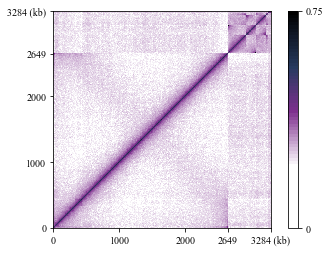

In [3]:
import scipy.io as sio
plt.rc('font',family='Times New Roman') 
fig, ax0 = plt.subplots()

C2 = sio.loadmat('../python_codes/MyColormaps2.mat')
C = C2['mycmap2']
cm = mpl.colors.ListedColormap(C)
plot1 = ax0.imshow(DR**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
cb1 = colorbar(plot1)
cb1.set_ticks([0,0.75])
cb1.set_ticklabels([0,0.75])

plt.xticks([0,200,400,529,659], [0,1000,2000,2649,'3284 (kb)'])
plt.yticks([0,200,400,529,659], [0,1000,2000,2649,'3284 (kb)'])
plt.savefig('../pictures/wt_contact_map.jpg', bbox_inches='tight', dpi=300)

In [4]:
DR_chr1 = DR[:530,:530]
DR_chr2 = DR[530:613,530:613]
DR_p1 = DR[613:649,613:649]
DR_p2 = DR[649:659,649:659]

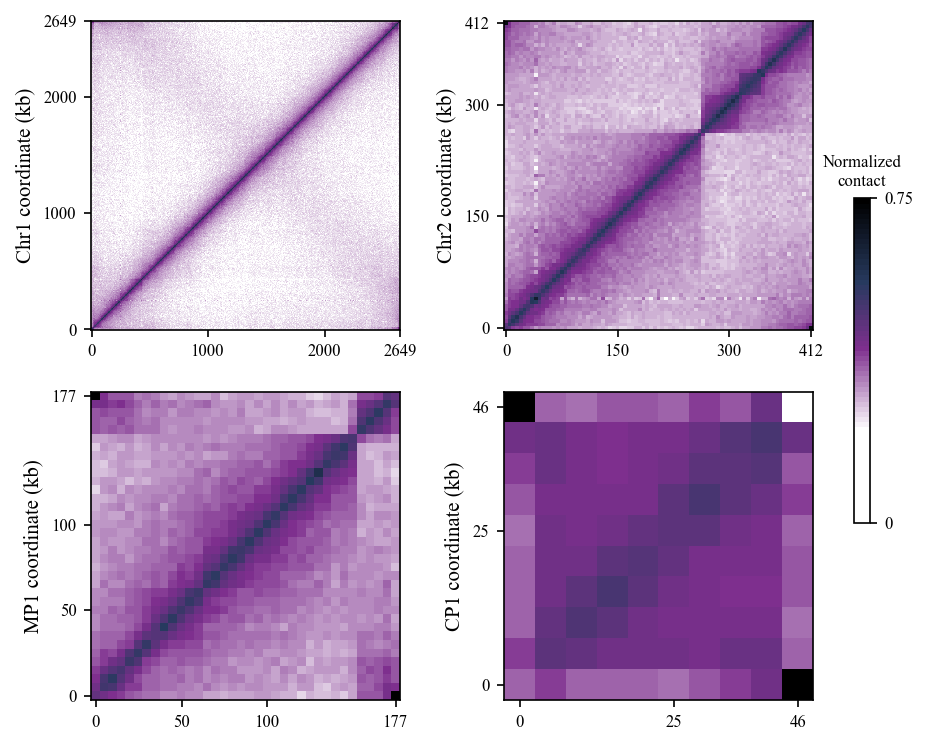

In [5]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(7, 6), dpi=150)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 8})

gs = gridspec.GridSpec(2, 2, figure=fig)
ax0 = plt.subplot(gs[0])
plot0 = ax0.imshow(DR_chr1**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
plt.xticks([0,200,400,530], [0,1000,2000,2649])
plt.yticks([0,200,400,530], [0,1000,2000,2649])
ax0.set_ylabel("Chr1 coordinate (kb)", fontsize=10)

ax1 = plt.subplot(gs[1])
plot1 = ax1.imshow(DR_chr2**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
plt.xticks([0,30,60,82], [0,150,300,412])
plt.yticks([0,30,60,82], [0,150,300,412])
ax1.set_ylabel("Chr2 coordinate (kb)", fontsize=10)

ax2 = plt.subplot(gs[2])
plot2 = ax2.imshow(DR_p1**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
plt.xticks([0,10,20,35], [0,50,100,177])
plt.yticks([0,10,20,35], [0,50,100,177])
#ax2.set_xlabel("MP1 coordinate (kb)")
ax2.set_ylabel("MP1 coordinate (kb)", fontsize=10)

ax3 = plt.subplot(gs[3])
plot3 = ax3.imshow(DR_p2**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
plt.xticks([0,5,9], [0,25,46])
plt.yticks([0,5,9], [0,25,46])
#ax3.set_xlabel("CP1 coordinate (kb)")
ax3.set_ylabel("CP1 coordinate (kb)", fontsize=10)

cb3 = colorbar(plot3, ax=[ax0, ax1, ax2, ax3], fraction=0.02, pad=0.05)
cb3.set_ticks([0,0.75])
cb3.set_ticklabels([0,0.75])
cb3.ax.tick_params(labelsize=8)
cb3.ax.set_title('Normalized\ncontact',fontsize=8)

plt.savefig("../pictures/Four_replicons_contact_map.jpg", bbox_inches='tight', dpi=300)

# ultraviolet irradiation vs. control

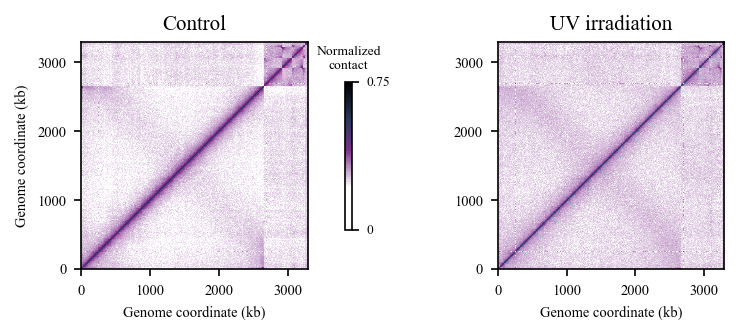

In [6]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(7, 2), dpi=150)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 7})

gs = gridspec.GridSpec(1, 2, figure=fig)
ax0 = plt.subplot(gs[0])
plot1 = ax0.imshow(DR**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
cb1 = colorbar(plot1, fraction=0.02, pad=0.1)
cb1.set_ticks([0,0.75])
cb1.set_ticklabels([0,0.75])
cb1.ax.tick_params(labelsize=6.5)
cb1.ax.set_title('Normalized\ncontact',fontsize=6.5)

plt.xticks([0,200,400,600], [0,1000,2000,3000])
plt.yticks([0,200,400,600], [0,1000,2000,3000])
ax0.set_xlabel("Genome coordinate (kb)")
ax0.set_ylabel("Genome coordinate (kb)")
ax0.set_title("Control", fontsize=10)


ax1 = plt.subplot(gs[1], sharey=ax0)
plot2 = ax1.imshow(UV**0.2, cmap=cm, interpolation="none", origin = 'lower', vmin=0, vmax=0.75)
plt.xticks([0,200,400,600], [0,1000,2000,3000])
ax1.set_xlabel("Genome coordinate (kb)")
ax1.set_title("UV irradiation", fontsize=10)

plt.savefig("../pictures/UV_wt_control_map.jpg", bbox_inches='tight', dpi=300)

## ratio plot

In [7]:
from scipy import stats
import sys
sys.path.append("../python_codes/")
import os
import shutil
from scalogram_2d_type import *
import scipy.ndimage

In [8]:
BIN = 5000
scales=range(0,200)

s_WT=scalo2(DR[:530,:530],scales,BIN)
s_UV=scalo2(UV[:530,:530],scales,BIN)

<ipython-input-9-4af2d6840bff>:2: RuntimeWarning: divide by zero encountered in divide
  s1=log(s_UV/s_WT)
<ipython-input-9-4af2d6840bff>:2: RuntimeWarning: invalid value encountered in divide
  s1=log(s_UV/s_WT)
<ipython-input-9-4af2d6840bff>:2: RuntimeWarning: divide by zero encountered in log
  s1=log(s_UV/s_WT)


(200, 530)


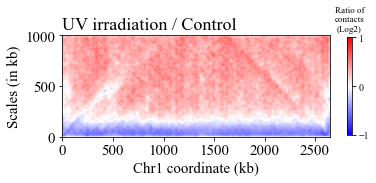

In [9]:
# plots:
s1=log(s_UV/s_WT)
s1=s1[range(s1.shape[0]-1,-1,-1),:]
print(s1.shape)

# with gaussian filter:
s1[np.isnan(s1)] = 0.0
s1[np.isinf(s1)] = 0.0

plt.rc('font',family='Times New Roman')
matplotlib.rcParams.update({'font.size': 15})
fig, ax = plt.subplots()
extent=(0, 530, 0, len(scales))
img_gaus = scipy.ndimage.gaussian_filter(s1, 2, mode='wrap')
plot2 = ax.imshow(img_gaus, interpolation='none', extent=extent, cmap="bwr", vmin=-1.0, vmax=1.0)
cbar = plt.colorbar(plot2, shrink = 0.45, ticks=[-1,0,1])
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_title('Ratio of\ncontacts\n(Log2)',fontsize=9)
ax.set_xlabel("Chr1 coordinate (kb)")
ax.set_ylabel("Scales (in kb)")
ax.set_title('UV irradiation / Control', loc='left')

tick_locs = range(0,s1.shape[1],100)
tick_lbls = (array(range(0,s1.shape[1],100)) * 5).tolist()
plt.xticks(tick_locs, tick_lbls)
plt.yticks([0,100,200],[0,500,1000])

plt.savefig("../pictures/UV_control_ratio_plot_scales_200.jpg", bbox_inches='tight', dpi=300)

## directional_indice

In [10]:
import directional_indice

scales2 = 20
wt_chr1 = DR[:530,:530]
wt_chr2 = DR[530:613,530:613]
wt_DI20_chr1 = directional_indice.directional(wt_chr1,scales2)
wt_DI20_chr2 = directional_indice.directional(wt_chr2,scales2)

uv_chr1 = UV[:530,:530]
uv_chr2 = UV[530:613,530:613]
uv_DI20_chr1 = directional_indice.directional(uv_chr1,scales2)
uv_DI20_chr2 = directional_indice.directional(uv_chr2,scales2)

Size of the matrix entetered for the directional index:
530
Size of the matrix entetered for the directional index:
83
Size of the matrix entetered for the directional index:
530
Size of the matrix entetered for the directional index:
83


In [11]:
def DImax_2(DI20):
    for i in range(len(DI20)):
        if DI20[i] > 2:
            DI20[i] = 2
    return DI20
wt_DI20_chr1 = DImax_2(wt_DI20_chr1)
wt_DI20_chr2 = DImax_2(wt_DI20_chr2)
uv_DI20_chr1 = DImax_2(uv_DI20_chr1)
uv_DI20_chr2 = DImax_2(uv_DI20_chr2)

In [12]:
def CID_identify(borders2, thr, bin_num):
    CID = []
    for i in borders2:
        if i >= thr:
            CID.append(thr)
        if i <= -thr:
            CID.append(-thr)
        if i < thr and i > -thr:
            CID.append(i)

    CID_Boundary_count = 0
    CID_Boundary = []
    for i in range(bin_num):     # BIN numbering starts from 0
        try:
            d = CID.index(thr,i)
            #print(i)
            #print(d)
            if CID[i] == -thr and CID[i+1:d].count(-thr) == 0:
                CID_Boundary_count = CID_Boundary_count + 1
                CID_Boundary.append([i,d])
        except ValueError:
            pass
    return CID_Boundary_count, CID_Boundary

CID_Boundary_count1, CID_Boundary1 = CID_identify(wt_DI20_chr1[:,0], 2, 530)
print(CID_Boundary_count1)
print(CID_Boundary1)
CID_Boundary_count2, CID_Boundary2 = CID_identify(wt_DI20_chr2[:,0], 2, 83)
print(CID_Boundary_count2)
print(CID_Boundary2)

uv_CID_Boundary_count1, uv_CID_Boundary1 = CID_identify(uv_DI20_chr1[:,0], 2, 530)
print(uv_CID_Boundary_count1)
print(uv_CID_Boundary1)
uv_CID_Boundary_count2, uv_CID_Boundary2 = CID_identify(uv_DI20_chr2[:,0], 2, 83)
print(uv_CID_Boundary_count2)
print(uv_CID_Boundary2)

21
[[3, 5], [49, 50], [64, 68], [86, 88], [109, 118], [138, 143], [174, 176], [198, 199], [206, 216], [227, 241], [251, 254], [263, 271], [285, 288], [296, 302], [352, 360], [368, 401], [410, 414], [438, 442], [456, 457], [491, 494], [516, 517]]
2
[[0, 1], [52, 53]]
15
[[3, 5], [49, 55], [61, 64], [132, 137], [182, 186], [209, 212], [229, 234], [250, 254], [265, 270], [299, 309], [334, 339], [347, 370], [425, 429], [471, 478], [481, 486]]
3
[[8, 9], [52, 53], [73, 76]]


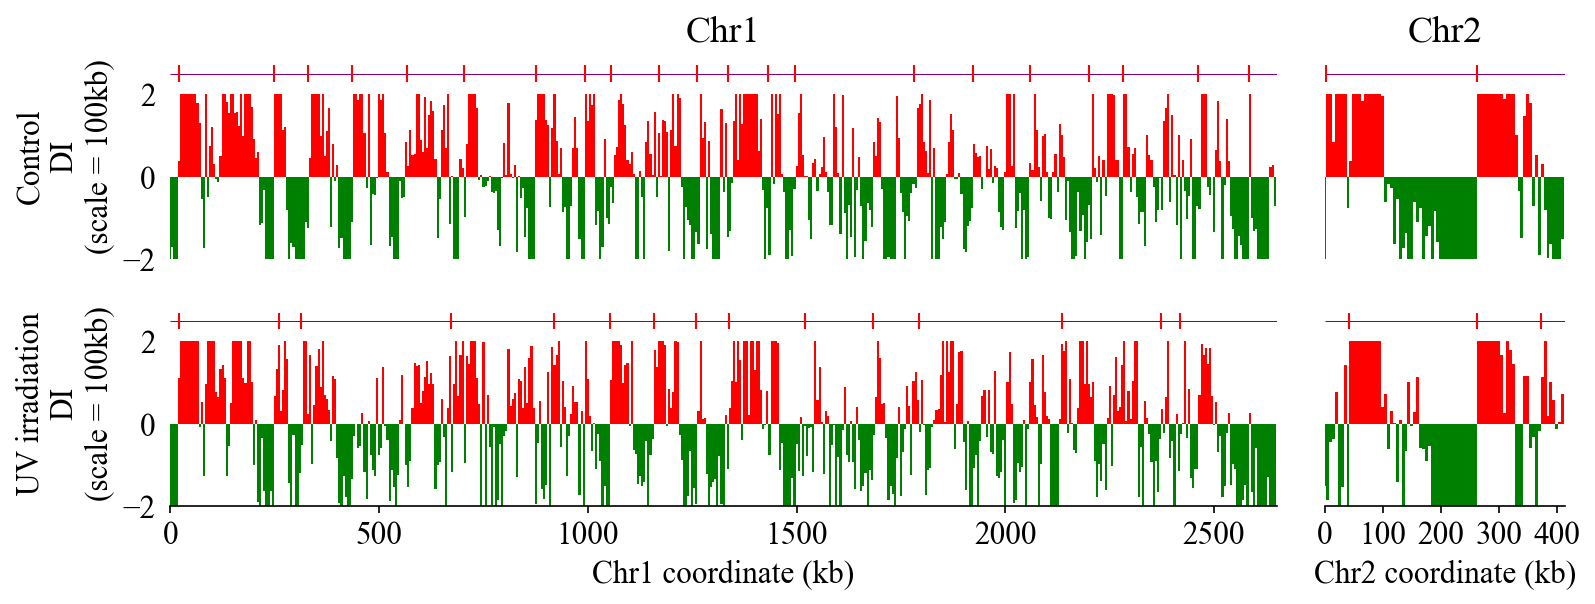

In [13]:
fig = plt.figure(figsize=(12, 4), dpi=150)
plt.rc('font',family='Times New Roman') 
matplotlib.rcParams.update({'font.size': 15})

gs = gridspec.GridSpec(2, 5, figure=fig)
ax0 = plt.subplot(gs[0,0:4])
borders1 = list(range(len(wt_DI20_chr1)))
borders2 = array(wt_DI20_chr1[:,0])
ax0.set_xlim([0, len(wt_DI20_chr1.T)])
ax0.set_xticks([0,wt_chr1.shape[0]])
ax0.set_ylim([-2.0, 3.0])
colormap=np.where(borders2>0, "r", "g")
ax0.bar(x=borders1, height=borders2, color=colormap, width=1)
ax0.set_ylabel("Control\nDI\n(scale = 100kb)")
tick_locs = range(0,wt_chr1.shape[0],100)
tick_lbls = (array( range(0,wt_chr1.shape[0],100)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax0.set_title("Chr1")
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.xaxis.set_visible(False)
ax0.tick_params(left=False)
ax0.hlines(2.5, 0, 530, color ="purple", lw=0.5)
for i in CID_Boundary1:
    ax0.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)

ax1 = plt.subplot(gs[0,4:6], sharey = ax0)
borders3 = list(range(len(wt_DI20_chr2)))
borders4 = array(wt_DI20_chr2[:,0])
ax1.set_xlim([0, len(wt_DI20_chr2.T)])
ax1.set_xticks([0,wt_chr2.shape[0]])
ax1.set_ylim([-2.0, 3.0])
colormap1=np.where(borders4>0, "r", "g")
ax1.bar(x=borders3, height=borders4, color=colormap1, width=1)
ax1.yaxis.set_visible(False)
tick_locs = range(0,wt_chr2.shape[0],20)
tick_lbls = (array( range(0,wt_chr2.shape[0],20)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax1.set_title("Chr2")
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.set_visible(False)
ax1.hlines(2.5, 0, 83, color ="purple", lw=0.5)
for i in CID_Boundary2:
    ax1.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)
    
ax3 = plt.subplot(gs[1,0:4])
borders5 = list(range(len(uv_DI20_chr1)))
borders6 = array(uv_DI20_chr1[:,0])
ax3.set_xlim([0, len(uv_DI20_chr1.T)])
ax3.set_xticks([0,uv_chr1.shape[0]])
ax3.set_ylim([-2.0, 3.0])
colormap1=np.where(borders6>0, "r", "g")
ax3.bar(x=borders5, height=borders6, color=colormap1, width=1)
ax3.set_ylabel("UV irradiation\nDI\n(scale = 100kb)")
tick_locs = range(0,uv_chr1.shape[0],100)
tick_lbls = (array( range(0,uv_chr1.shape[0],100)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax3.set_xlabel("Chr1 coordinate (kb)")
ax3.spines['left'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.tick_params(left=False)
ax3.hlines(2.5, 0, 530, color ="purple", lw=0.5)
for i in uv_CID_Boundary1:
    ax3.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)

ax4 = plt.subplot(gs[1,4:6], sharey = ax3)
borders7 = list(range(len(uv_DI20_chr2)))
borders8 = array(uv_DI20_chr2[:,0])
ax4.set_xlim([0, len(uv_DI20_chr2.T)])
ax4.set_xticks([0,uv_chr2.shape[0]])
ax4.set_ylim([-2.0, 3.0])
colormap1=np.where(borders8>0, "r", "g")
ax4.bar(x=borders7, height=borders8, color=colormap1, width=1)
ax4.yaxis.set_visible(False)
tick_locs = range(0,uv_chr2.shape[0],20)
tick_lbls = (array( range(0,uv_chr2.shape[0],20)) * 5 ).tolist()
plt.xticks(tick_locs, tick_lbls)
ax4.set_xlabel("Chr2 coordinate (kb)")
ax4.spines['left'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.hlines(2.5, 0, 83, color ="purple", lw=0.5)
for i in uv_CID_Boundary2:
    ax4.vlines((i[0]+i[1])/2, 2.7, 2.3, colors='red', lw=1)
    
plt.savefig("../pictures/UV_control_DI.jpg", bbox_inches='tight', dpi=300)

# ΔDr_ebfC mutant vs. wild type

## triangular contact map

In [14]:
def triangular_diag(A):
    n1 = A.shape[0];
    print("Size of the matrix entetered for the triangular representation:")
    print(n1)
    scales = range(0,int(n1/2))
    TRI = np.zeros((len(scales), n1))
    
    for i in range(0,n1) :
        for k in scales :
            kp =i-k;
            lp =i+k;
            # Circularity conditions: 
            if kp < 0 :
                kp = n1 +kp ; TRI[k,i] = 'NaN';
            elif lp < 0 :
                lp = n1 +lp ; TRI[k,i] = 'NaN';
            elif kp >= n1 :
                kp = kp - n1;  TRI[k,i] = 'NaN';
            elif lp >= n1:
                lp = lp - n1;  TRI[k,i] = 'NaN';
            else :
                TRI[k,i] = A[kp,lp];           
    return TRI

TRI = triangular_diag(DR)
TRI_ebfC = triangular_diag(ebfC)

Size of the matrix entetered for the triangular representation:
659
Size of the matrix entetered for the triangular representation:
659


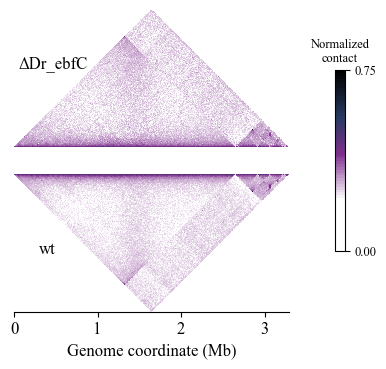

In [15]:
C2 = sio.loadmat('../python_codes/MyColormaps2.mat')
C = C2['mycmap2']
cm = mpl.colors.ListedColormap(C)

fig = plt.figure(figsize=(12, 4), dpi=100)
gs = gridspec.GridSpec(2, 1, figure=fig)
plt.rc('font',family='Times New Roman')
matplotlib.rcParams.update({'font.size': 12})

ax0 = plt.subplot(gs[0])
plot0 = ax0.imshow(TRI_ebfC**0.2, cmap=cm, interpolation="none", vmin=0, vmax=0.75)
ax0.invert_yaxis()
ax0.xaxis.set_visible(False)
ax0.yaxis.set_visible(False)
ax0.text(10,190,"ΔDr_ebfC", size=12)
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)

ax1 = plt.subplot(gs[1], sharex=ax0)
plot1 = ax1.imshow(TRI**0.2, cmap=cm, interpolation="none", vmin=0, vmax=0.75)
cb1 = colorbar(plot1, ax=[ax0, ax1], shrink = 0.6, ticks=[0,0.75])
cb1.ax.tick_params(labelsize=9)
cb1.ax.set_title('Normalized\ncontact',fontsize=9)
ax1.text(60,190,"wt", size=12)
ax1.set_xlabel("Genome coordinate (Mb)")
ax1.yaxis.set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
tick_locs = range(0,DR.shape[0],200)
plt.xticks(tick_locs, [0,1,2,3])

plt.savefig("../pictures/ebfc_vs_wt_triangular_contact_map.jpg", bbox_inches='tight', dpi=300)

## Plot of chromosome interaction frequency as a function of genomic distance 

In [16]:
def dist_law(A):
    n1 = A.shape[0];
    th = 0;  # a threshold for a minimal distance above with calculate the signal 
    print("Size of the matrix entetered for the Compaction signal :")
    print(n1)
    
    dist = np.zeros((n1//2 +1, 1));
    n_int = np.zeros((n1, 1));
  
    for nw in range(0,n1//2 +1) :   # scales
        somme = [];         
        for i in range(0,n1) :      # over the whole matrix
                kp= i - nw;
                lp= i + nw;
                if kp < 0 :
                    kp = n1 +kp ;
                if lp < 0 :
                    lp = n1 +lp ; 
                if kp >= n1 :
                    kp = kp - n1;
                if lp >= n1:
                    lp = lp - n1;
                    
                somme.append(A[i,kp]);
                somme.append(A[i,lp]);
                
        dist[nw] = np.mean(somme)                      
    return dist

In [17]:
wt_chr1 = DR[:530,:530]
ebfC_chr1 = ebfC[:530,:530]

dist1 = dist_law(wt_chr1)
dist2 = dist_law(ebfC_chr1)

Size of the matrix entetered for the Compaction signal :
530
Size of the matrix entetered for the Compaction signal :
530


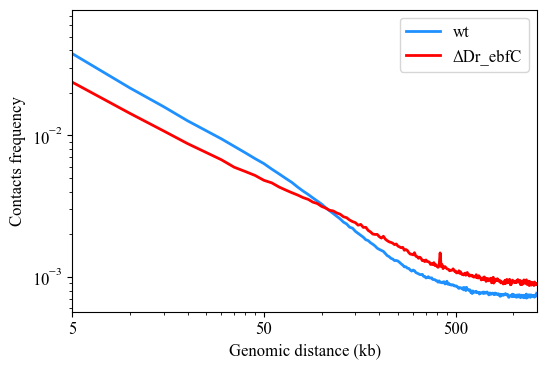

In [18]:
matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
plt.rc('font',family='Times New Roman')
ax.plot(dist1,color="dodgerblue",linewidth=2.0,label='wt')
ax.plot(dist2,color="red",linewidth=2.0,label='ΔDr_ebfC')

ax.set_xlim(1,266)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("Genomic distance (kb)")
ax.set_ylabel("Contacts frequency")
ticks = ax.set_xticks([1,10,100])
labels = ax.set_xticklabels([5,50,500])
plt.legend()

plt.savefig("../pictures/wt_ebfC_contact.jpg", bbox_inches='tight', dpi=300)